## IMPORT LIBRARY

In [49]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import optimizers,datasets,Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import numpy as np

## PREVIEW DATA

In [37]:
(x_train_raw,y_train_raw) , (x_test_raw,y_test_raw) = datasets.fashion_mnist.load_data()

In [38]:
print('Train: X=%s, y=%s' % (x_train_raw.shape, y_train_raw.shape))
print('Test: X=%s, y=%s' % (x_test_raw.shape, y_test_raw.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


#### Encoding Data

In [39]:
num_class = 10
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
#One Hot Encoding
y_train = to_categorical(y_train_raw,num_class)
y_test = to_categorical(y_test_raw,num_class)

#### Preview Gambar

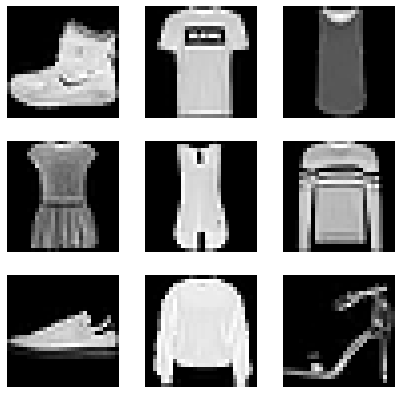

In [40]:
plt.figure(figsize=(7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i],cmap='gray')
  plt.axis('off')

plt.show()

#### Reshape Gambar

In [41]:
x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000,784)

#### Scaling Gambar

In [42]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#### Buat Model

In [43]:
model_mnist = Sequential()

#Input Layer
model_mnist.add(Dense(512,activation='relu',input_dim=784))

#Hidden Layer
model_mnist.add(Dense(256,activation='relu'))
model_mnist.add(Dense(128,activation='relu'))

#Output Layer
model_mnist.add(Dense(10,activation='softmax'))

#### Compile Model

In [44]:
Optimizer = optimizers.Adam(learning_rate=0.0001)

model_mnist.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer,
                    metrics=['accuracy'])

#### Training Model

In [45]:
history = model_mnist.fit(x_train,y_train,epochs=10,batch_size=128,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.6629 - accuracy: 0.7831 - val_loss: 0.4741 - val_accuracy: 0.8358
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.4182 - accuracy: 0.8540 - val_loss: 0.4207 - val_accuracy: 0.8510
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3770 - accuracy: 0.8672 - val_loss: 0.3970 - val_accuracy: 0.8581
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3491 - accuracy: 0.8757 - val_loss: 0.3797 - val_accuracy: 0.8656
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3300 - accuracy: 0.8820 - val_loss: 0.3816 - val_accuracy: 0.8643
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3142 - accuracy: 0.8878 - val_loss: 0.3717 - val_accuracy: 0.8671
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2988 - accuracy: 0.8917 - val_loss: 0.3459 - val_accuracy: 0.8768

#### Evaluate Model

In [46]:
score = model_mnist.evaluate(x_test,y_test,verbose=1)
print(f'Test Loss    : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)} %')

313/313 [==============================] - 1s 4ms/step - loss: 0.3318 - accuracy: 0.8798
Test Loss    : 0.3317761719226837
Test Akurasi : 87.98 %


#### Predict Model

In [47]:
predictions = model_mnist.predict(x_test)

313/313 [==============================] - 2s 6ms/step


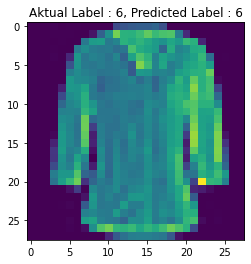

In [82]:
label = np.argmax(predictions,axis=1)
ActualLabel = np.argmax(y_test[4])

img = x_test[4].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[4]}")

plt.imshow(img)
plt.show()

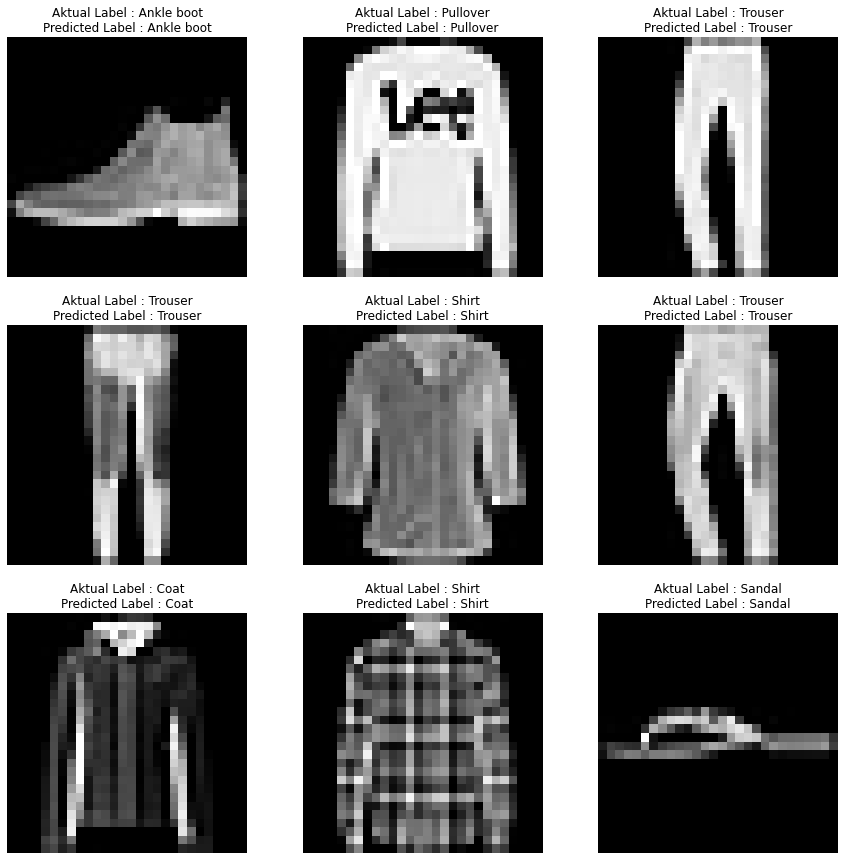

In [83]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)


  actual = class_names[np.argmax(y_test[i])]

  plt.title(f"Aktual Label : {actual}\nPredicted Label : {class_names[label[i]]}")
  plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
  plt.axis('off')

plt.show()

In [ ]:
y_test